In [1]:
import nltk

In [2]:
#nltk.download_gui()  # downloaded stop words

In [3]:
messages = [line.rstrip() for line in open('/Users/sudhanshukumar/Documents/Development/Machine Learning/0 csv files/SMSSpamCollection.csv')]
print(len(messages))

5574


In [4]:
for message_no, message in enumerate(messages[:3]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's




**Due to the spacing we can tell that this is a TSV ("tab separated values") file**

In [5]:
import pandas as pd

In [6]:
messages=pd.read_csv("/Users/sudhanshukumar/Documents/Development/Machine Learning/0 csv files/SMSSpamCollection.csv",sep='\t',
                    names=["label","message"])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()    # a lot of messages are repeated

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
# adding a new feature -> len (number of letters in a text message)

messages["length"]=messages["message"].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualisation

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

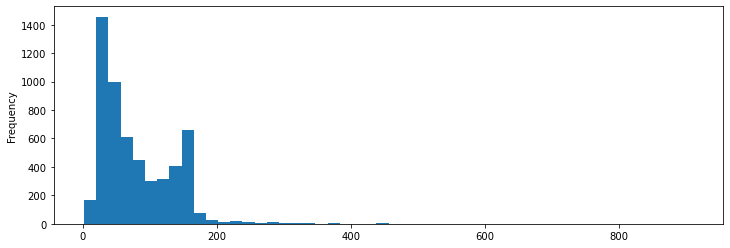

In [12]:
messages['length'].plot(bins=50, kind='hist',figsize=(12,4)) 

In [13]:
messages.length.describe()   #check out the max column

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
# the longest message could be a outlier
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

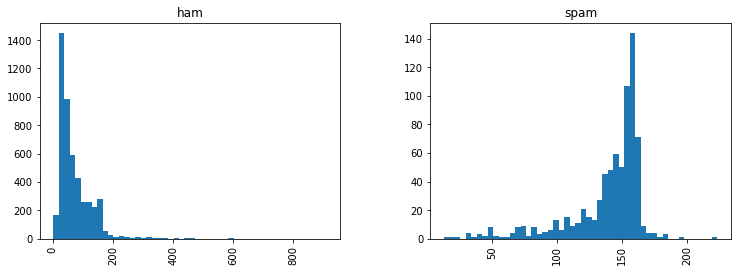

In [15]:
# x-axis ="length", separated by label
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

#from the plots below we can conclude that-> spam messages(130-170) tend to be longer than ham messages(10-50)

## Text Pre-processing

In [16]:
#sample

import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [17]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [18]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
# return word if lower case version of that word is not in stopwords

clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [20]:
# Create a func to carry out this task

def text_process(mess):
    
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [21]:
messages["message"].head(3).apply(text_process)  #returns list of words

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
Name: message, dtype: object

## Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer 

bow_transformer=CountVectorizer(analyzer=text_process).fit(messages["message"])

In [23]:
print(len(bow_transformer.vocabulary_))

11425


In [24]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [25]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


#### This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:



In [26]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


#### Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages

In [27]:
messages_bow = bow_transformer.transform(messages['message'])

In [28]:
messages_bow.shape

(5572, 11425)

## Note:
**TfidfVectorizer is used on sentences, while TfidfTransformer is used on an existing count matrix, such as one returned by CountVectorizer**

**With Tfidftransformer you will compute word counts using CountVectorizer and then compute the IDF values and only then compute the Tf-idf scores. With Tfidfvectorizer you will do all three steps at once.**

In [29]:
 #TF-IDF
    
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer= TfidfTransformer()
tfidf_transformer.fit(messages_bow)

TfidfTransformer()

In [30]:
#sample-> how it looks
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

#tfidf value is now associated with this message -> bow4

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [31]:
#final after pre-processing

messages_tfidf = tfidf_transformer.transform(messages_bow) 

In [114]:
X=messages_tfidf
y=messages["label"]

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
#training the model

from sklearn.svm import LinearSVC

spam_detect_model= LinearSVC(C=4)
spam_detect_model.fit(X_train,y_train)

LinearSVC(C=4)

#### use train test split as a good practice

In [129]:
spam_detect_model.score(X_test,y_test)

0.9820627802690582

In [35]:
spam_detect_model.predict(messages_tfidf)[3]

'ham'

In [36]:
messages["label"][3]

'ham'

In [59]:
msg_train, msg_test, label_train, label_test =train_test_split(messages['message'], messages['label'], test_size=0.2)

#### We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [43]:
from sklearn.pipeline import Pipeline

In [108]:
#creating pipeline object (imp part)
# TfidfVectorizer can also be used directly to reduce steps

pipeline= Pipeline([
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tfidf",TfidfTransformer()),
    ("classifier",LinearSVC(C=6)),
])

In [109]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f8bf80eecb0>)),
                ('tfidf', TfidfTransformer()), ('classifier', LinearSVC(C=6))])

In [110]:
# improved performance with LinearSVC()

pipeline.score(msg_test,label_test)

0.9856502242152466

In [47]:
from sklearn.metrics import classification_report

predictions=pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       968
        spam       0.88      0.99      0.94       147

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115

